Saving StudentsPerformance.csv to StudentsPerformance.csv
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
MSE: 207.91715060774996
RMSE: 14.419332529897144
R² Score: 0.030085923188504338
                     

/tmp/ipython-input-697158049.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


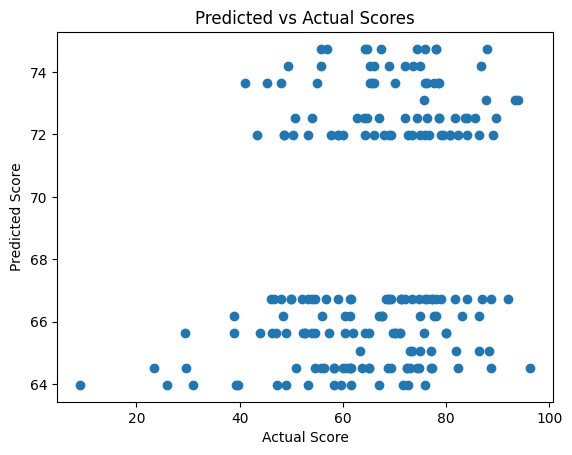

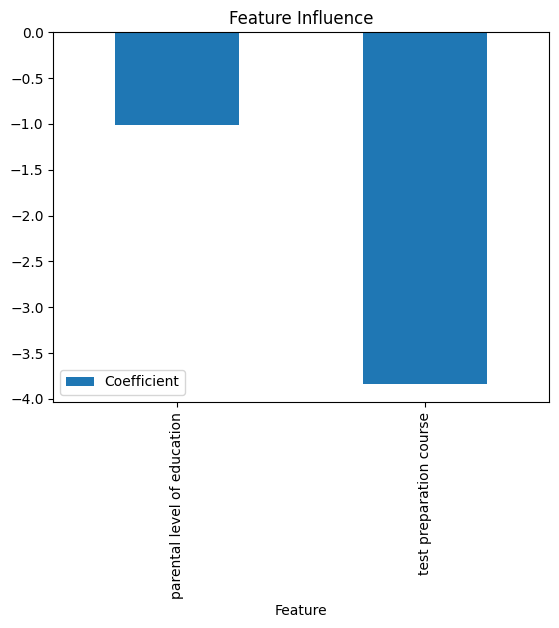

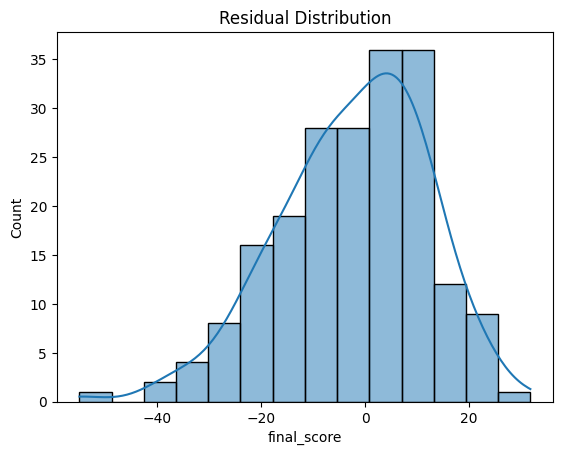

In [ ]:
# Roll No: 24BAD084
# Name: Noorin Nashika M
# Scenario 1 - Multilinear Regression
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_csv("StudentsPerformance.csv")
print(data.head())
# Target Variable: Average Score
data["final_score"] = (data["math score"] +
                       data["reading score"] +
                       data["writing score"]) / 3
le = LabelEncoder()
data["parental level of education"] = le.fit_transform(
    data["parental level of education"])
data["test preparation course"] = le.fit_transform(
    data["test preparation course"])
X = data[[
    "parental level of education",
    "test preparation course"
]]
y = data["final_score"]
X.fillna(X.mean(), inplace=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print(coeff_df)
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Predicted vs Actual Scores")
plt.show()
coeff_df.plot(kind="bar", x="Feature", y="Coefficient")
plt.title("Feature Influence")
plt.show()
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

